##  Coal Resources Analysis

## Importing all the libraries required for the project

In [16]:
import pandas as pd         # For data manipulation
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting basic charts
import seaborn as sns            # For more advanced and aesthetic statistical visualizations
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For normalizing or scaling the data
from sklearn.model_selection import train_test_split            # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression               # For regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # For ensemble methods
from sklearn.metrics import mean_squared_error, r2_score         # For evaluating model performance
from sklearn.decomposition import PCA                           # For Principal Component Analysis
from sklearn.cluster import KMeans                              # For clustering analysis
from sklearn.metrics import silhouette_score                    # Silhouette score
from mpl_toolkits.mplot3d import Axes3D                         # For 3D plotting
from scipy.cluster.hierarchy import dendrogram, linkage          # For hierarchical clustering
import requests                                                 # For making HTTP requests
from sklearn.cluster import DBSCAN                              # For Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

## Extracting the data using the API

In [17]:


def fetch_data(url, headers, max_records):
    data_accumulator = []
    offset = 0
    while True:
        response = requests.get(f"{url}&offset={offset}", headers=headers)
        if response.status_code == 200:
            data = response.json()['response']['data']
            if not data:
                break
            data_accumulator.extend(data)
            offset += len(data)
            if len(data_accumulator) >= max_records:
                break
        else:
            print("Failed to fetch data:", response.status_code)
            break
    return pd.DataFrame(data_accumulator)

# API URL and headers
url = 'https://api.eia.gov/v2/coal/shipments/plant-aggregates/data/?frequency=annual&data[0]=ash-content&data[1]=heat-content&data[2]=price&data[3]=quantity&data[4]=sulfur-content&sort[0][column]=period&sort[0][direction]=desc'
headers = {
    'X-API-KEY': 'MB7EGjS54VIQfq1cPzgeyutY4fsUiBlnYewlcVIV',
}

# Fetch up to 20000 records
df = fetch_data(url, headers, 20500)
print(df)


      period location      plantStateDescription  plant  \
0       2023      PAB  Pennsylvania (Bituminous)   6249   
1       2023       ND               North Dakota  56786   
2       2023       WY                    Wyoming   8066   
3       2023       TX                      Texas   7902   
4       2023      KYE            Kentucky (East)   7737   
...      ...      ...                        ...    ...   
20425   2008      WVN   West Virginia (Northern)   3775   
20426   2008       CO                   Colorado   3775   
20427   2008       OH                       Ohio   6004   
20428   2008       WY                    Wyoming  10671   
20429   2008      OVR                   Overseas  10673   

                     plantName rank coalRankDescription ash-content  \
0                       Winyah  TOT                 All        8.61   
1           Spiritwood Station  TOT                 All        8.38   
2                  Jim Bridger  TOT                 All       10.61   
3      

In [18]:
df.shape

(20430, 17)

# Importing the necessary libraries

In [19]:
pip install seaborn

## Data Cleaning

In [20]:
df.shape

(20430, 17)

In [67]:
df

,period,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
0,2023,Pennsylvania (Bituminous),6249,Winyah,TOT,All,8.61,12125,63.14,1357855,2.60
1,2023,North Dakota,56786,Spiritwood Station,TOT,All,8.38,7237,43.23,76391,0.64
2,2023,Wyoming,8066,Jim Bridger,TOT,All,10.61,9215,64.26,4698553,0.54
3,2023,Texas,7902,Pirkey,LIG,Lignite,16.22,6610,47.26,738180,0.74
4,2023,Kentucky (East),7737,Kapstone,BIT,Bituminous,9.75,12860,NaN,87731,0.87
...,...,...,...,...,...,...,...,...,...,...,...
20425,2008,West Virginia (Northern),3775,Clinch River,TOT,All,11.68,12512,70.62,1528764,0.76
20426,2008,Colorado,3775,Clinch River,BIT,Bituminous,11.68,12512,70.62,1528764,0.76
20427,2008,Ohio,6004,Pleasants Power Station,TOT,All,8.83,12290,NaN,3388599,4.01
20428,2008,Wyoming,10671,AES Shady Point LLC,SUB,Subbituminous,6.84,8798,NaN,915815,0.89


In [68]:


down_df = df
down_df = pandas.DataFrame(down_df)
down_df.to_csv('down_df.csv', index=False)


## Dropping irrelevant columns
Dropping irrelevant columns is an essential step in data cleaning to ensure that the dataset is optmized for analysis.
Dropping irrelevant columns like `ash-content-units`, `heat-content-units`, `price-units`, `quantity-units`, `sulfur-content-units`, `location` as the units are not needed for the analysis

In [21]:
# Dropping unwanted columns
columns_to_drop = ['location','ash-content-units', 'heat-content-units', 'price-units', 'quantity-units', 'sulfur-content-units']
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(df.head())


  period      plantStateDescription  plant           plantName rank  \
0   2023  Pennsylvania (Bituminous)   6249              Winyah  TOT   
1   2023               North Dakota  56786  Spiritwood Station  TOT   
2   2023                    Wyoming   8066         Jim Bridger  TOT   
3   2023                      Texas   7902              Pirkey  LIG   
4   2023            Kentucky (East)   7737            Kapstone  BIT   

  coalRankDescription ash-content heat-content  price quantity sulfur-content  
0                 All        8.61        12125  63.14  1357855            2.6  
1                 All        8.38         7237  43.23    76391            .64  
2                 All       10.61         9215  64.26  4698553            .54  
3             Lignite       16.22         6610  47.26   738180            .74  
4          Bituminous        9.75        12860      w    87731            .87  


## Handling Missing values

### Checking for Missing values

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


period                    0
plantStateDescription     0
plant                     0
plantName                 0
rank                      0
coalRankDescription       0
ash-content               0
heat-content              0
price                    11
quantity                  0
sulfur-content            0
dtype: int64


### Dropping rows with missing `price` values as the price column is critical and it should not be filled with an estimated data

In [8]:
#
df = df.dropna(subset=['price'])
print(df.isnull().sum())  # Checking again for missing values


period                   0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    0
quantity                 0
sulfur-content           0
dtype: int64


## Ensuring Data Types are correct or not

In [12]:
# Check the current data types
print(df.dtypes)


period                   object
plantStateDescription    object
plant                    object
plantName                object
rank                     object
coalRankDescription      object
ash-content              object
heat-content             object
price                    object
quantity                 object
sulfur-content           object
dtype: object


## Dropping non-numeric values present before converting them to type float

In [28]:
# Identify non-numeric values in the columns you're trying to convert
for column in columns_to_convert:
    non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()][column]
    if not non_numeric.empty:
        print(f"Non-numeric values in {column}:")
        print(non_numeric)


Non-numeric values in price:
4       NaN
7       NaN
12      NaN
14      NaN
18      NaN
         ..
20422   NaN
20423   NaN
20427   NaN
20428   NaN
20429   NaN
Name: price, Length: 5225, dtype: float64


In [29]:
# Define the columns you want to convert
columns_to_convert = ['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']

# Identify non-numeric values in the columns you're trying to convert
for column in columns_to_convert:
    non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()][column]
    if not non_numeric.empty:
        print(f"Non-numeric values in {column}:")
        print(non_numeric)


Non-numeric values in price:
4       NaN
7       NaN
12      NaN
14      NaN
18      NaN
         ..
20422   NaN
20423   NaN
20427   NaN
20428   NaN
20429   NaN
Name: price, Length: 5225, dtype: float64


#### Converting the numeric columns to float data type

In [30]:
# Convert columns to numeric, forcing invalid parsing to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check if there are any remaining non-numeric values (should be NaN now)
print(df[columns_to_convert].isna().sum())

# Optionally, remove rows with NaN values in these columns
df_cleaned = df.dropna(subset=columns_to_convert)

print(df_cleaned.dtypes)


ash-content          0
heat-content         0
price             5225
quantity             0
sulfur-content       0
dtype: int64
period                    object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                    float64
quantity                   int64
sulfur-content           float64
dtype: object


# Optional handling for outlier

In [31]:

# def detect_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers

#
# columns_to_check = ['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']

#
# for column in columns_to_check:
#     outliers = detect_outliers_iqr(df, column)
#     print(f"Outliers detected in {column}:")
#     print(outliers)

#
# df_no_outliers = df.copy()
# for column in columns_to_check:
#     Q1 = df_no_outliers[column].quantile(0.25)
#     Q3 = df_no_outliers[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#
#     df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

# print("Data after removing outliers:")
# print(df_no_outliers.describe())


In [32]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       period      plantStateDescription  plant                plantName rank  \
0       2023  Pennsylvania (Bituminous)   6249                   Winyah  TOT   
1       2023               North Dakota  56786       Spiritwood Station  TOT   
2       2023                    Wyoming   8066              Jim Bridger  TOT   
3       2023                      Texas   7902                   Pirkey  LIG   
4       2023            Kentucky (East)   7737                 Kapstone  BIT   
...      ...                        ...    ...                      ...  ...   
20425   2008   West Virginia (Northern)   3775             Clinch River  TOT   
20426   2008                   Colorado   3775             Clinch River  BIT   
20427   2008                       Ohio   6004  Pleasants Power Station  TOT   
20428   2008                    Wyoming  10671      AES Shady Point LLC  SUB   
20429   2008                   Overseas  10673               AES Hawaii  BIT   

      coalRankDescription  ash-content  heat-content  price  quantity  \
0                     All         8.61         12125  63.14   1357855   
1                     All         8.38          7237  43.23     76391   
2                     All        10.61          9215  64.26   4698553   
3                 Lignite        16.22          6610  47.26    738180   
4              Bituminous         9.75         12860    NaN     87731   
...                   ...          ...           ...    ...       ...   
20425                 All        11.68         12512  70.62   1528764   
20426          Bituminous        11.68         12512  70.62   1528764   
20427                 All         8.83         12290    NaN   3388599   
20428       Subbituminous         6.84          8798    NaN    915815   
20429          Bituminous         8.77         10607    NaN    582249   

       sulfur-content  
0                2.60  
1                0.64  
2                0.54  
3                0.74  
4                0.87  
...               ...  
20425            0.76  
20426            0.76  
20427            4.01  
20428            0.89  
20429            0.60  

[20430 rows x 11 columns]>

In [33]:
df.to_csv('cleaned_data.csv', index=False)


### 1. Distribution of Ash Content
The ash content distribution provides insights into the quality of coal, with higher ash content generally indicating lower fuel quality. This histogram helps identify the most common ash content levels across different coal shipments, revealing how coal quality varies in the dataset.

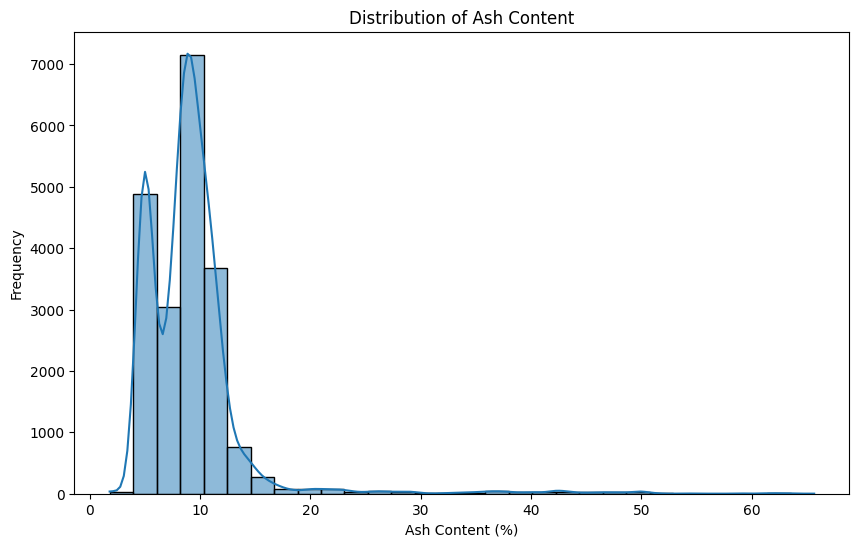

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ash-content'], bins=30, kde=True)
plt.title('Distribution of Ash Content')
plt.xlabel('Ash Content (%)')
plt.ylabel('Frequency')
plt.show()


### 2. Annual Trend of Coal Price
This line plot illustrates how the average price of coal has changed over time. It helps identify any trends or fluctuations in the coal market.


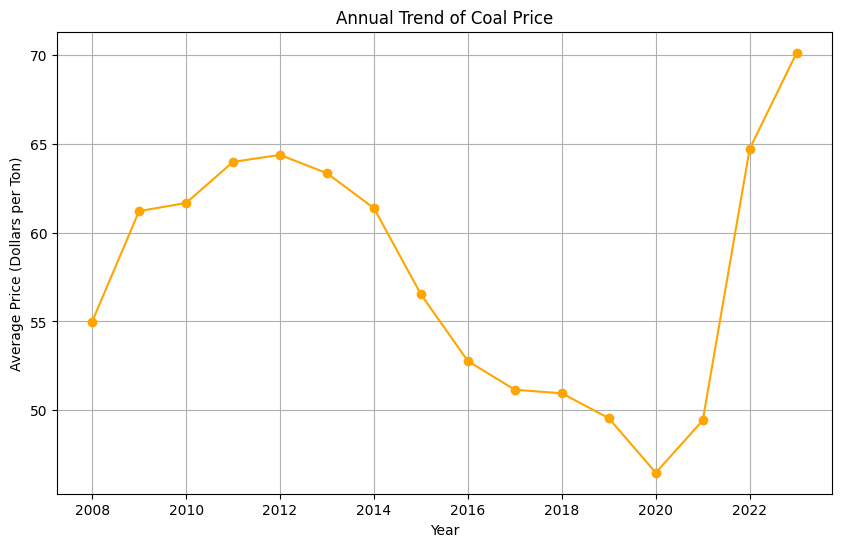

In [35]:
price_trend = df.groupby('period')['price'].mean()
plt.figure(figsize=(10, 6))
price_trend.plot(kind='line', marker='o', color='orange')
plt.title('Annual Trend of Coal Price')
plt.xlabel('Year')
plt.ylabel('Average Price (Dollars per Ton)')
plt.grid(True)
plt.show()


### 3. Heat Content vs. Price
This scatter plot shows the relationship between heat content and price. It helps identify whether higher heat content coal is generally more expensive.

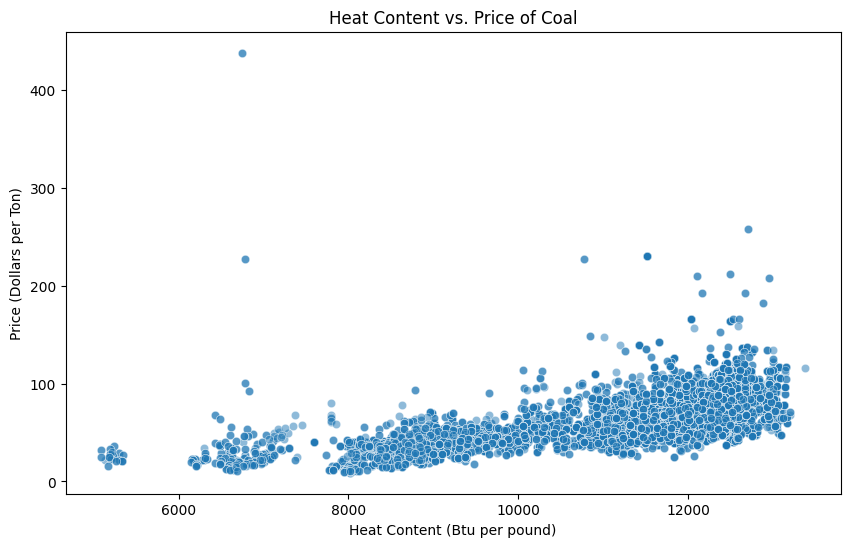

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='heat-content', y='price', data=df, alpha=0.5)
plt.title('Heat Content vs. Price of Coal')
plt.xlabel('Heat Content (Btu per pound)')
plt.ylabel('Price (Dollars per Ton)')
plt.show()


### 4. Sulfur Content by Coal Rank
The box plot highlights the variation of sulfur content across different coal ranks, showing the median, quartiles, and potential outliers for each rank.



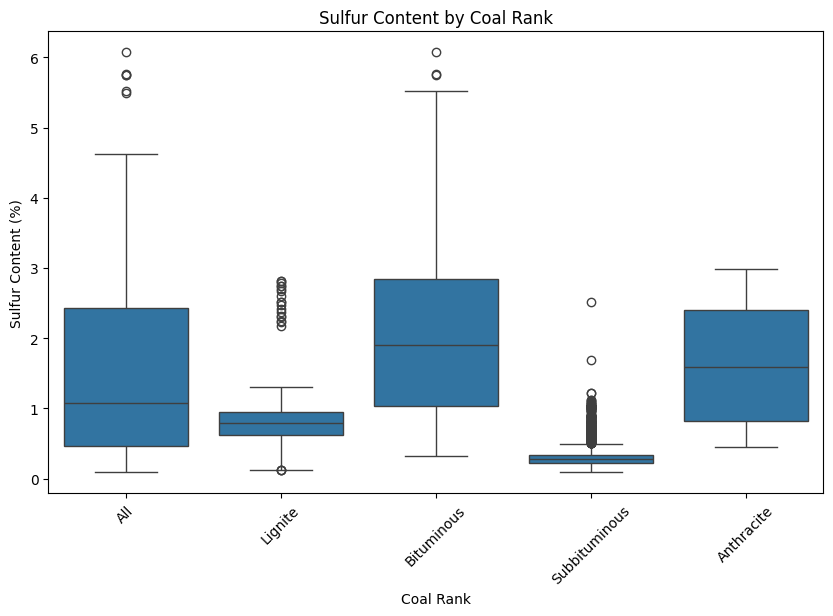

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='coalRankDescription', y='sulfur-content', data=df)
plt.title('Sulfur Content by Coal Rank')
plt.xlabel('Coal Rank')
plt.ylabel('Sulfur Content (%)')
plt.xticks(rotation=45)
plt.show()


### 5. Total Quantity of Coal by State

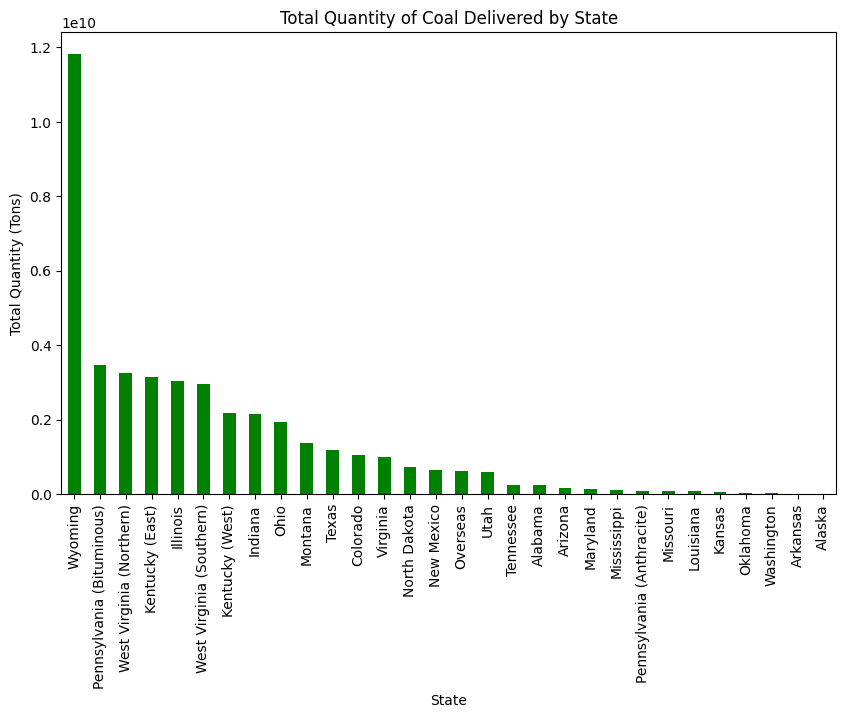

In [38]:
state_quantity = df.groupby('plantStateDescription')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
state_quantity.plot(kind='bar', color='green')
plt.title('Total Quantity of Coal Delivered by State')
plt.xlabel('State')
plt.ylabel('Total Quantity (Tons)')
plt.xticks(rotation=90)
plt.show()


### 6. Coal Rank by Year
The stacked bar plot shows the distribution of coal ranks (such as bituminous, lignite, etc.) across different years. It highlights how the composition of coal shipments has evolved.

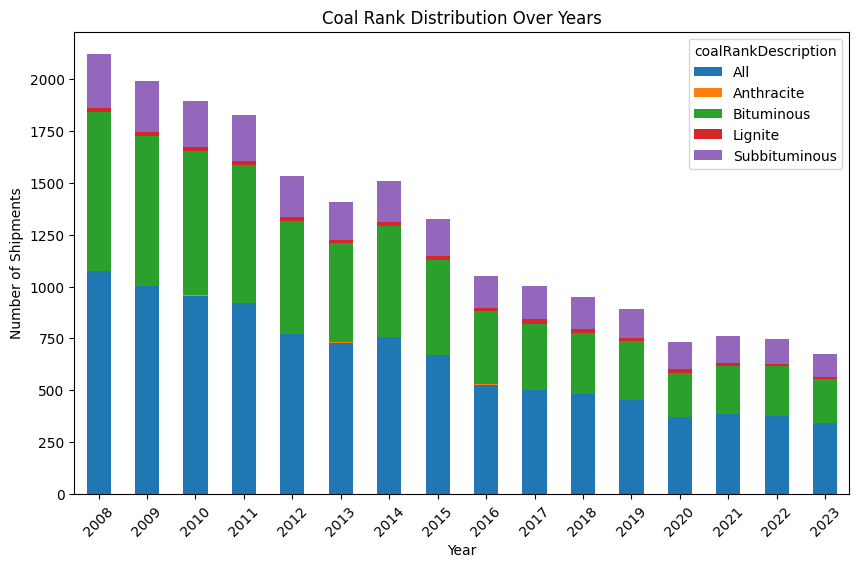

In [39]:
coal_rank_year = df.groupby(['period', 'coalRankDescription']).size().unstack()
coal_rank_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Coal Rank Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()


### 7. Heat Content Distribution by Coal Rank
The violin plot shows the distribution of heat content for each coal rank. It provides both the range and density of the data, offering more insights than a box plot alone.

<ipython-input-40-ea6a87fbcc17>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='coalRankDescription', y='heat-content', data=df,
<ipython-input-40-ea6a87fbcc17>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='coalRankDescription', y='heat-content', data=df,


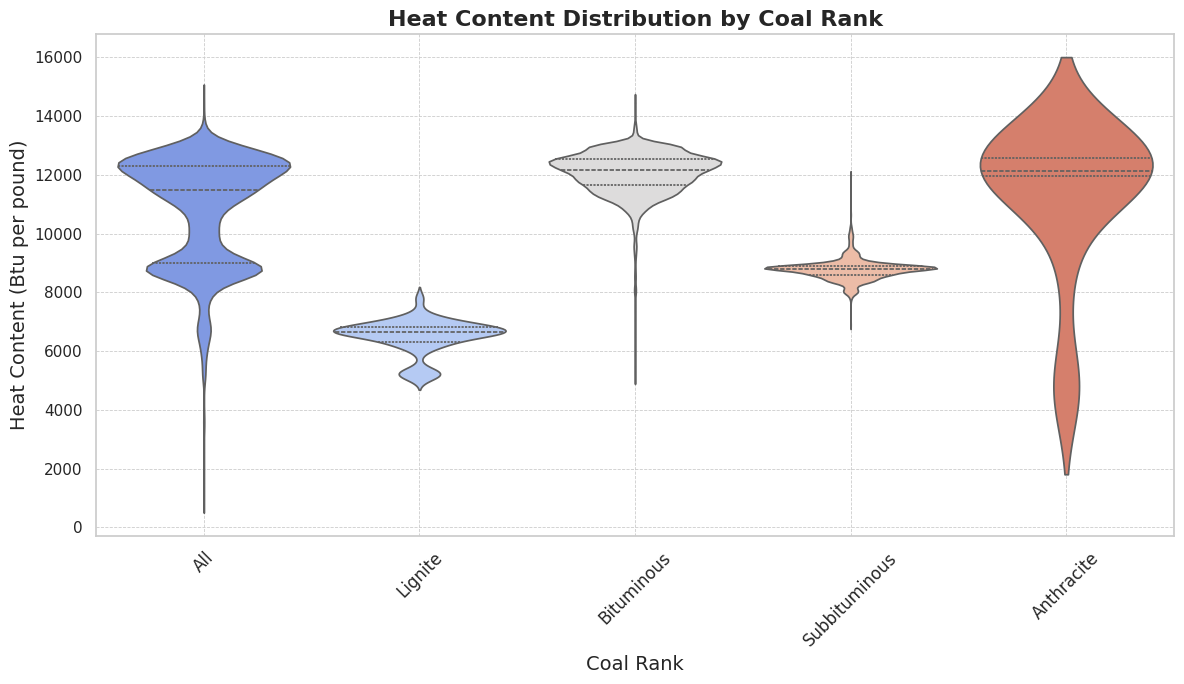

In [40]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with custom size
plt.figure(figsize=(12, 7))

# Plot the violin plot with a color palette
sns.violinplot(x='coalRankDescription', y='heat-content', data=df,
               palette='coolwarm', inner='quartile', scale='width')

# Adding title and labels with custom fonts and size
plt.title('Heat Content Distribution by Coal Rank', fontsize=16, fontweight='bold')
plt.xlabel('Coal Rank', fontsize=14)
plt.ylabel('Heat Content (Btu per pound)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Adding grid lines to the plot
plt.grid(True, linestyle='--', linewidth=0.6)

# Add some padding around the plot
plt.tight_layout()

# Display the plot
plt.show()

## 8. Heatmap of Correlation Between Numeric Features
This heatmap shows the correlation between numeric variables in your dataset, allowing you to easily identify relationships between features such as heat content, price, and sulfur content.

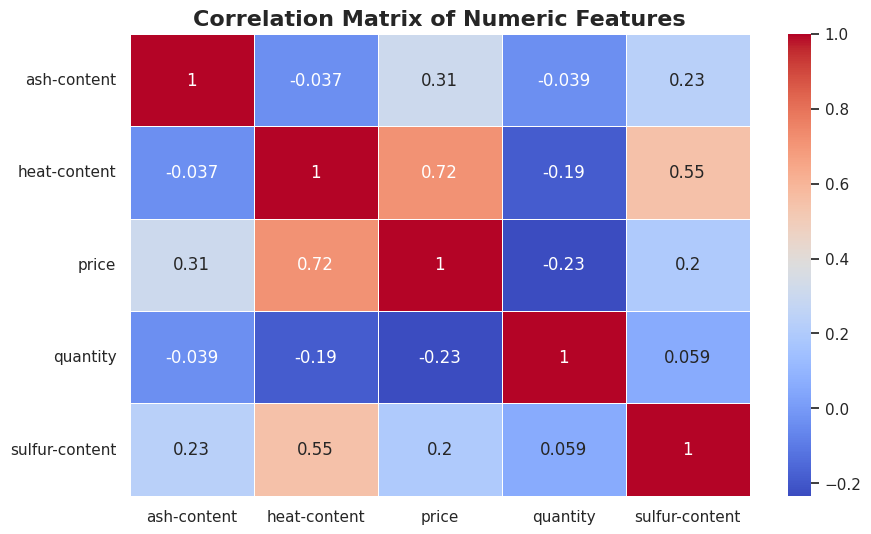

In [41]:
corr_matrix = df[['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

## 9. Stacked Area Plot of Quantity Over Time by Coal Rank
This stacked area plot shows the total coal quantity over time, separated by coal rank. The colors stack on top of each other to show how the contributions of each coal rank have changed over time.

<Figure size 1000x600 with 0 Axes>

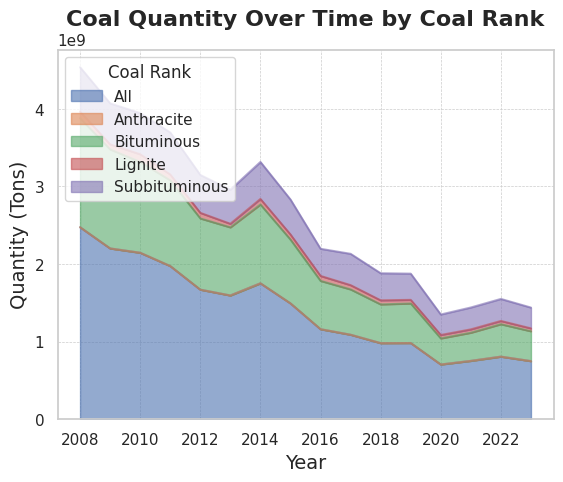

In [42]:
# Aggregate data to sum quantity by period and coal rank
quantity_over_time = df.groupby(['period', 'coalRankDescription'])['quantity'].sum().unstack()

# Plot stacked area chart
plt.figure(figsize=(10, 6))
quantity_over_time.plot.area(stacked=True, alpha=0.6)
plt.title('Coal Quantity Over Time by Coal Rank', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quantity (Tons)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Coal Rank', loc='upper left')
plt.show()


## 10. Donut Chart of Coal Rank Distribution
The donut chart provides an appealing alternative to the pie chart, showcasing the distribution of different coal ranks across the dataset. The hollow center makes the visualization more unique and easier to interpret.

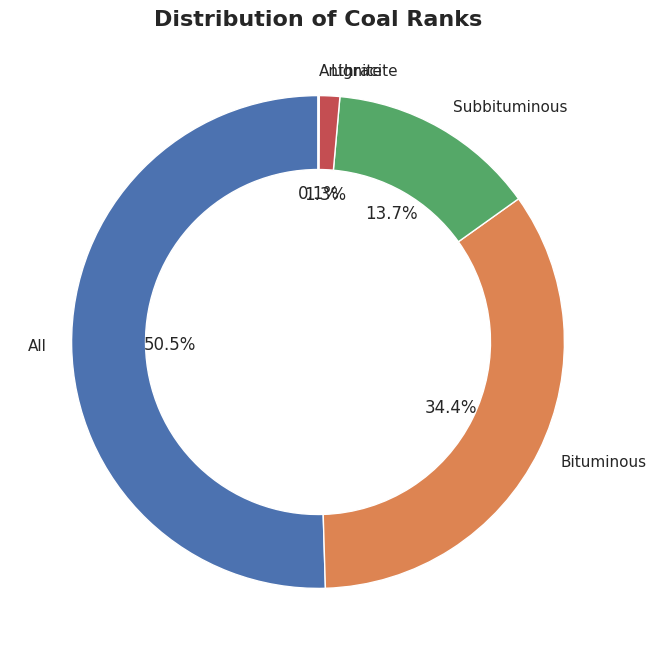

In [43]:

coal_rank_counts = df['coalRankDescription'].value_counts()

# Plot Donut chart
plt.figure(figsize=(8, 8))
plt.pie(coal_rank_counts, labels=coal_rank_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Coal Ranks', fontsize=16, fontweight='bold')
plt.gca().set_aspect('equal')
plt.show()


## PHASE 2 of Project

## Preparing data for PCA

#### Before applying PCA we should ensure the data is fully numeric as PCA can only be applied for quantiative data

In [64]:


# Dropping non-numeric columns
pca_df = df[['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']]

# Drop any rows with missing values
pca_df.dropna(inplace=True)

# Display the cleaned data
pca_df.head()


<ipython-input-64-6d7c338ccd89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df.dropna(inplace=True)


,ash-content,heat-content,price,quantity,sulfur-content
0,8.61,12125,63.14,1357855,2.60
1,8.38,7237,43.23,76391,0.64
2,10.61,9215,64.26,4698553,0.54
3,16.22,6610,47.26,738180,0.74
5,8.49,10985,49.04,3330230,2.44


## Normalizing the Data
#### PCA requires normalized data, using StandardScaler from sklearn to standardize the data

In [69]:
# Standardizing the data
scaler = StandardScaler()
pca_normalized = scaler.fit_transform(pca_df)
pca_normalized

array([[-0.03972178,  0.76721811,  0.17947556, -0.39441675,  1.0884597 ],
       [-0.10741785, -2.18541056, -0.59361106, -1.03032837, -0.73010865],
       [ 0.54893972, -0.9905866 ,  0.22296411,  1.26336581, -0.82289275],
       ...,
       [ 1.66445327,  0.27491198, -0.04845103,  0.57762144,  0.68948807],
       [ 0.86387363,  1.00098802,  0.46991694, -0.30960514, -0.61876773],
       [ 0.86387363,  1.00098802,  0.46991694, -0.30960514, -0.61876773]])

## PCA with n_components = 2

In [70]:
# PCA with n_components=2
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(pca_normalized)
pca_2d_result

array([[ 1.07590263,  0.07653661],
       [-1.83342628, -0.93313856],
       [-0.81047823,  0.74401782],
       ...,
       [ 1.01588833,  1.20206669],
       [ 0.95663693, -0.46892243],
       [ 0.95663693, -0.46892243]])

### Visualizing the 2D result

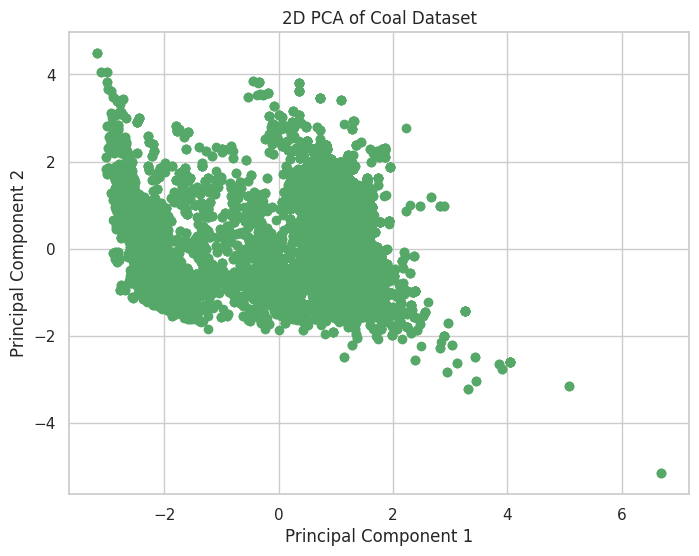

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c='g', marker='o')
plt.title('2D PCA of Coal Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## PCA with n_components = 3

In [71]:
# PCA with n_components=3
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(pca_normalized)
pca_3d_result

array([[ 1.07590263,  0.07653661, -0.46100253],
       [-1.83342628, -0.93313856,  1.1321794 ],
       [-0.81047823,  0.74401782,  0.65423554],
       ...,
       [ 1.01588833,  1.20206669,  1.08327465],
       [ 0.95663693, -0.46892243,  0.54956578],
       [ 0.95663693, -0.46892243,  0.54956578]])

## 3D visualization

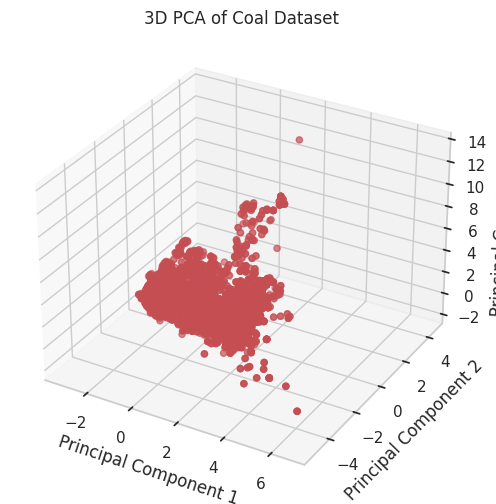

In [49]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c='r', marker='o')
ax.set_title('3D PCA of Coal Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## Percentage of Variance Explained

#### How much information remains in the 2D dataset

In [50]:
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"Variance retained with 2D PCA: {sum(explained_variance_2d) * 100:.2f}%")


Variance retained with 2D PCA: 68.33%


## How much information remains in the 3D dataset

In [51]:
explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"Variance retained with 3D PCA: {sum(explained_variance_3d) * 100:.2f}%")

Variance retained with 3D PCA: 83.06%


## Dimensions needed to retain 95% of the Data

In [52]:
pca_full = PCA().fit(pca_normalized)

cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

#components needed to retain 95% variance
n_components_95 = len(cumulative_variance[cumulative_variance < 0.95]) + 1
print(f"Number of components needed to retain 95% variance: {n_components_95}")


Number of components needed to retain 95% variance: 4


## Visualizing the cumulative variance

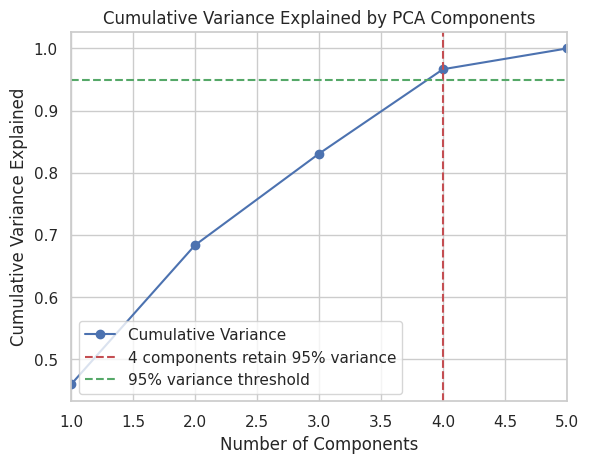

In [53]:


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative Variance')

# Highlighting the number of components needed to retain 95% variance
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'{n_components_95} components retain 95% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance threshold')

plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)

plt.xlim(left=1, right=len(cumulative_variance))

plt.show()











## Top 3 Eigenvalues

#### Eigenvalues corresponds to the amount of variance each principal component captures

In [54]:
# Eigenvalues
eigenvalues = pca_full.explained_variance_
print(f"Top three eigenvalues: {eigenvalues[:3]}")


Top three eigenvalues: [2.29551099 1.12114162 0.73644853]


# CLUSTERING

### Overview of Clustering Algorithms


#### K-Means Clustering: This algorithm partitions the data into K distinct clusters based on distance to the centroid of the clusters. It is suitable for large datasets but assumes clusters are spherical and of similar size.

#### Hierarchical Clustering: Builds nested clusters by progressively merging or splitting data points. This algorithm is great for understanding the data structure but can be computationally expensive.

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Identifies clusters of varying shapes in noisy data sets by focusing on areas of high density. This method does not require specifying the number of clusters beforehand, making it useful in scenarios where we do not know how many clusters to expect.

## Using the PCA dataset from the 3D data

## Step 1: Visualizing Silhouette scores to determine optimal k-values

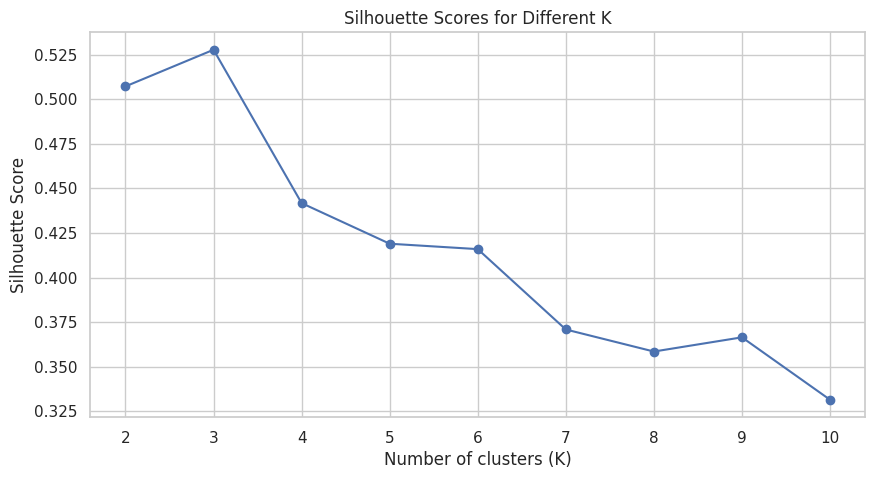

In [55]:
pca_data = pca_3d_result

silhouette_scores = []
K_range = range(2, 11)  # Testing from 2 to 10 clusters

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.show()

## Based on the Silhouette plot performing K-Means clustering for chosen k values (3,5,7) abd visualizing the 3D clusters

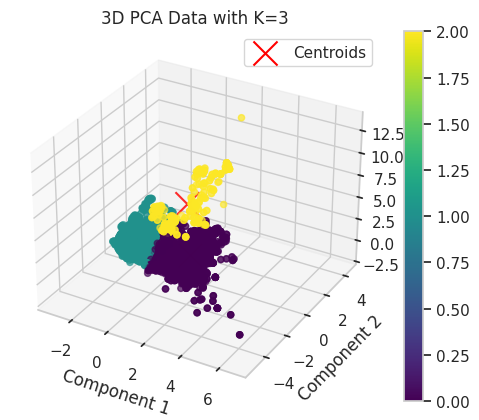

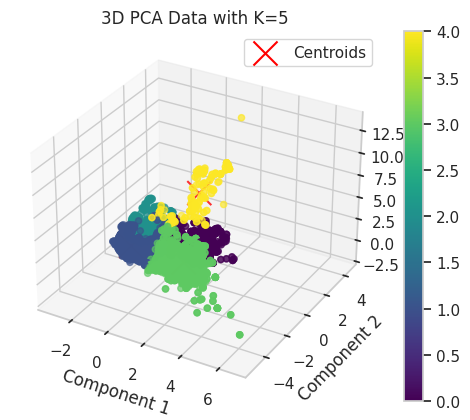

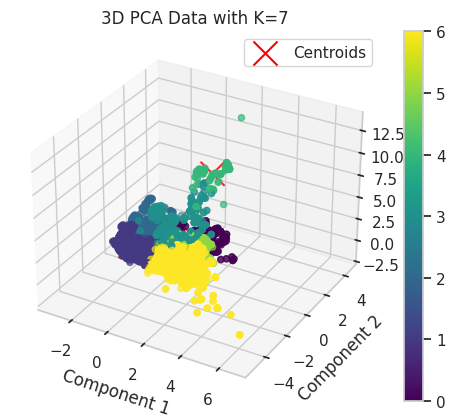

In [56]:
chosen_k_values = [3, 5, 7]  # Assume these are the good k-values based on the silhouette plot

for K in chosen_k_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(pca_data)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap='viridis')

    # Plotting centroids
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=300, c='red', marker='x', label='Centroids')

    ax.set_title(f'3D PCA Data with K={K}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()
    plt.colorbar(scatter)
    plt.show()


## Hierarchical Clustering

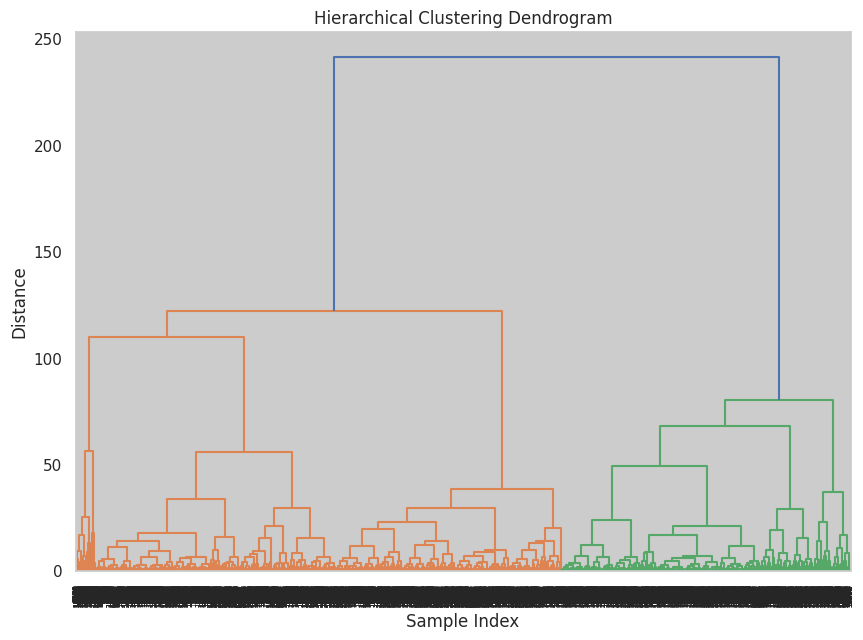

In [57]:
# Generate the linkage matrix for hierarchical clustering
linked = linkage(pca_data, 'ward')  # Using 'ward' method, but you can experiment with others like 'single', 'complete'

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


How would you compare the dendrogram results to the kmeans results?


When comparing the dendrogram from hierarchical clustering to the K-means results, several observations can be made:

1. **Complexity vs Simplicity**: The dendrogram provides a more complex hierarchical structure of clusters that reveals not only the clusters themselves but also the relationships and proximities between different clusters at various levels of similarity. This can be especially useful in understanding the natural groupings within the data. On the other hand, K-means clustering results in a simpler, flat clustering approach where each cluster is distinct and there is no inherent structure or relationship shown between the clusters.

2. **Determining the Number of Clusters**: In hierarchical clustering, the dendrogram allows for a visual determination of the number of clusters by 'cutting' the dendrogram at different heights. This can yield different numbers of clusters based on the level of granularity desired. In contrast, K-means clustering requires the number of clusters to be specified beforehand, which often necessitates using methods like the silhouette score to determine the most appropriate K, as seen in your plots.

3. **Sensitivity to Outliers**: Hierarchical clustering, depending on the linkage criteria used (ward, complete, average, etc.), can be more sensitive to noise and outliers compared to K-means, which tends to focus on creating clusters based on centroids, potentially making it less sensitive to outliers unless they significantly affect the mean of the cluster.

4. **Visualization and Interpretation**: The 3D PCA plots with K-means provide a clear visual of how data points are grouped around centroids in a reduced dimensional space, which is straightforward to interpret in terms of cluster cores and dispersion. The dendrogram, while offering a detailed hierarchical view, might require more interpretation to understand the depth and breadth of cluster branches.

Overall, hierarchical clustering offers a nuanced view of how all points relate to each other, which might be useful for detailed exploratory data analysis. In contrast, K-means provides a practical approach to partitioning the data into distinct groups, which can be easier to align with specific operational objectives like customer segmentation, inventory categorization, etc. Both methods have their applications and choosing between them depends on the specific needs of the analysis and the nature of the data.

## DBSCAN

### Groups points based on density (regions with a higher concentration of points) and is robust to outliers. Works well for arbitrary-shaped clusters.

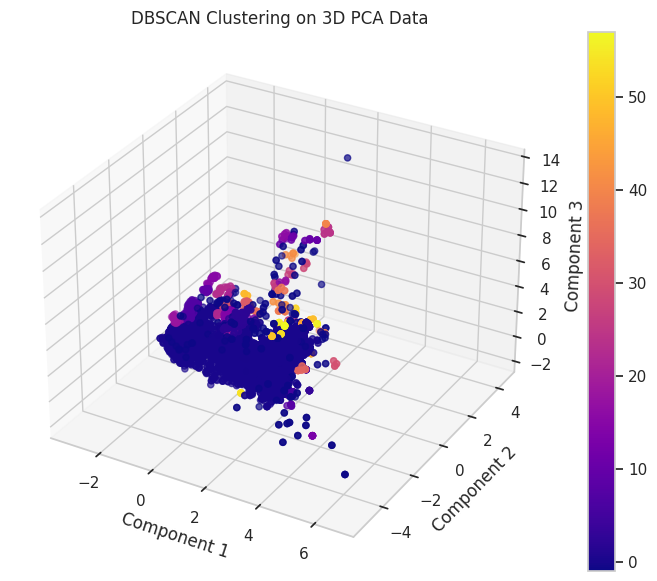

In [58]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(pca_data)

# Visualize the DBSCAN clustering results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=db_labels, cmap='plasma')

ax.set_title('DBSCAN Clustering on 3D PCA Data')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.colorbar(scatter)
plt.show()

Comparision of DBSCAN with other clusters

The DBSCAN clustering results displayed in the 3D PCA plot provide a distinct perspective compared to the K-means and hierarchical clustering results previously discussed:

1. **Density vs Centroid-Based Clustering**: DBSCAN is a density-based clustering algorithm that groups points that are closely packed together, while marking points in low-density regions as outliers. This method contrasts with K-means, which partitions the data into clusters with each data point belonging to the cluster with the nearest mean. In your DBSCAN plot, we see that most data points are concentrated in one large cluster with a few scattered outliers, reflecting the algorithm’s sensitivity to areas of high density.

2. **Handling of Outliers**: Unlike K-means, which assigns every point to a cluster even if it is far from the centroid, DBSCAN effectively identifies and isolates outliers. This is visible in your plot where several points are distanced from the main cluster, highlighted as separate outliers, which K-means would typically force into a cluster.

3. **Cluster Shape Flexibility**: DBSCAN does not assume clusters to be of any particular shape, as opposed to K-means which assumes clusters to be spherical. Therefore, DBSCAN can capture complex structures more effectively than K-means, which might explain why the DBSCAN clusters appear more spread and less uniform than those identified by K-means.

4. **Comparison with Hierarchical Clustering**: While hierarchical clustering provides a visual insight into the data grouping at various levels of granularity (as seen in the dendrogram), DBSCAN gives a more definitive partitioning of the data based on density. Hierarchical clustering might suggest several potential clusterings depending on where the dendrogram is cut, whereas DBSCAN explicitly highlights dense regions as clusters and points in sparse areas as noise or outliers.

Overall, DBSCAN offers a robust alternative, especially useful in scenarios where the data contains significant outliers or the clusters have irregular shapes. The visualization of DBSCAN results on the 3D PCA data showcases its ability to focus on areas of high data density and treat isolated points genuinely as outliers, providing a potentially more accurate reflection of inherent data patterns than K-means or hierarchical clustering when the cluster structure is not clearly globular.